In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'UScomments.csv', error_bad_lines=False)
df.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
df.shape

(691400, 4)

In [5]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
df.dropna(inplace=True)
# Clean values if some values are missing

In [7]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Sentiment Analysis
    Analyzing the sentiments of the user.
    Also known as opinion mining, is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral

In [8]:
from textblob import TextBlob

In [9]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [10]:
len(polarity)

691375

In [11]:
df['polarity'] = polarity

In [12]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Wordcloud Analysis

    Graphical representation of Text frequent words

In [13]:
filter1 = df['polarity']==1

In [14]:
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [15]:
filter1 = df['polarity'] == 1

In [16]:
comments_positive = df[filter1]

In [17]:
comments_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [18]:
filter2 = df['polarity'] == -1

In [19]:
comments_negative = df[filter2]

In [20]:
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [21]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS are used to make meaningless that helps to does not any affect of these words
like is, are, am, to, the, as, up

In [22]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [23]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [24]:
type(df['comment_text'])

pandas.core.series.Series

In [25]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [26]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

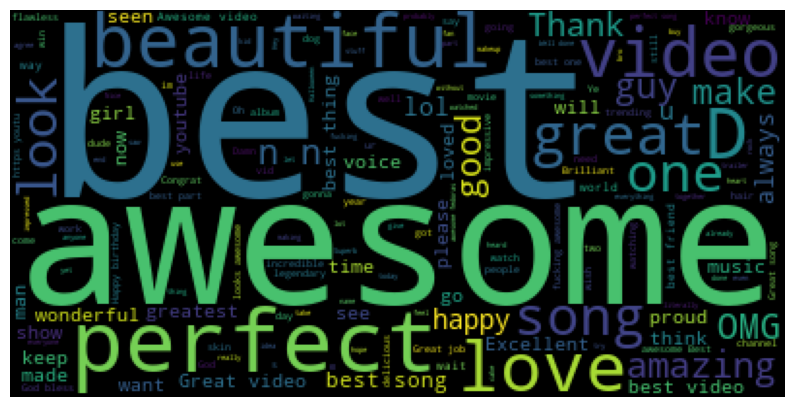

In [27]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [29]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

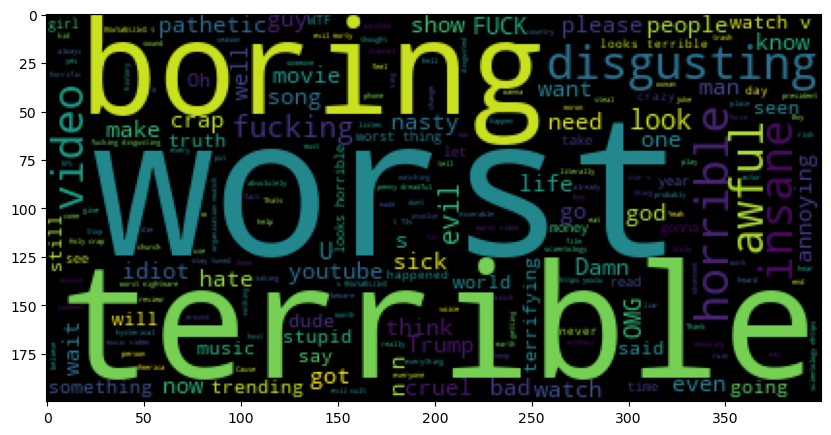

In [30]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis()

## Emoji Analysis

In [31]:
import emoji

In [32]:
df['comment_text'].head(7)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
Name: comment_text, dtype: object

In [33]:
## This is only for test
comment = 'trending 😉'     


[char for char in comment if char in emoji.EMOJI_DATA]


## This is also doing the same work. The upper one is list comprehension and the another one is using normal loop
# emoji_list = []
# for char in comment:
#     if char in emoji.EMOJI_DATA:
#         emoji_list.append(char)

# emoji_list

['😉']

In [34]:
all_emojis_list = []

for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [35]:
all_emojis_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [36]:
from collections import Counter

In [37]:
Counter(all_emojis_list)

Counter({'😂': 36987,
         '😍': 33453,
         '❤': 31119,
         '🔥': 8694,
         '😭': 8398,
         '👏': 5719,
         '😘': 5545,
         '👍': 5476,
         '💖': 5359,
         '💕': 5147,
         '♥': 4909,
         '😊': 3596,
         '🏻': 3438,
         '💜': 3429,
         '😬': 3381,
         '👌': 3112,
         '💙': 2831,
         '😢': 2672,
         '🏼': 2549,
         '🤣': 2279,
         '🙌': 2233,
         '😁': 2220,
         '💗': 2144,
         '😱': 2094,
         '🙏': 1818,
         '🌍': 1810,
         '😀': 1734,
         '💛': 1677,
         '🏽': 1593,
         '🤔': 1592,
         '💓': 1540,
         '😄': 1496,
         '😩': 1472,
         '💯': 1450,
         '💞': 1420,
         '😻': 1409,
         '😎': 1358,
         '💚': 1295,
         '😃': 1235,
         '😮': 1232,
         '🏾': 1205,
         '☺': 1180,
         '😆': 1149,
         '🐍': 1143,
         '😅': 1070,
         '😙': 1067,
         '💿': 1031,
         '😉': 998,
         '💋': 968,
         '💀': 926,


In [38]:
Counter(all_emojis_list).most_common()

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592),
 ('💓', 1540),
 ('😄', 1496),
 ('😩', 1472),
 ('💯', 1450),
 ('💞', 1420),
 ('😻', 1409),
 ('😎', 1358),
 ('💚', 1295),
 ('😃', 1235),
 ('😮', 1232),
 ('🏾', 1205),
 ('☺', 1180),
 ('😆', 1149),
 ('🐍', 1143),
 ('😅', 1070),
 ('😙', 1067),
 ('💿', 1031),
 ('😉', 998),
 ('💋', 968),
 ('💀', 926),
 ('💩', 925),
 ('🎶', 906),
 ('🤗', 896),
 ('✨', 889),
 ('🖕', 884),
 ('✌', 835),
 ('🔴', 824),
 ('🖤', 784),
 ('🔵', 759),
 ('😥', 742),
 ('🎃', 739),
 ('💘', 702),
 ('😫', 692),
 ('💪', 687),
 ('🎉', 684),
 ('👑', 678),
 ('👎', 673),
 ('😐', 644),
 ('😇', 640),
 ('😒', 629),
 ('💵', 628),
 ('🙄', 627),
 ('😏', 623),
 

In [39]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [40]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [41]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [42]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [43]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [44]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [45]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [46]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [47]:
trace = go.Bar(x=emojis, y=freqs)

In [48]:
iplot([trace])

In [49]:
import os

In [51]:
files = os.listdir('additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [52]:
files_csv = [file for file in files if '.csv' in file]

In [54]:
full_df = pd.DataFrame()
path = r'additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)

    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [55]:
full_df.shape

(375942, 16)

In [56]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [57]:
full_df = full_df.drop_duplicates()

In [58]:
full_df.shape

(339525, 16)

In [59]:
full_df.to_csv('C:/Users/SATYAM/Downloads/youtube_sample.csv', index=False)

In [60]:
full_df[0:1000].to_csv('C:/Users/SATYAM/Downloads/youtube_sample2.csv', index=False)

In [61]:
full_df.to_json('C:/Users/SATYAM/Downloads/youtube_sample3.json')

## Creating database

In [62]:
from sqlalchemy import create_engine

In [63]:
engine = create_engine(r'sqlite:///youtube_analysis.sqlite')

In [64]:
# full_df[:1000].to_sql('Users', con=engine, if_exists='append')
## This has to run one time other wise it conficts the data with multiple values

## Analysing the most liked

In [65]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [66]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [67]:
json_df = pd.read_json(r'additional_data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [68]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [69]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [70]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [71]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [72]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [73]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


## Which category has maximum number of likes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

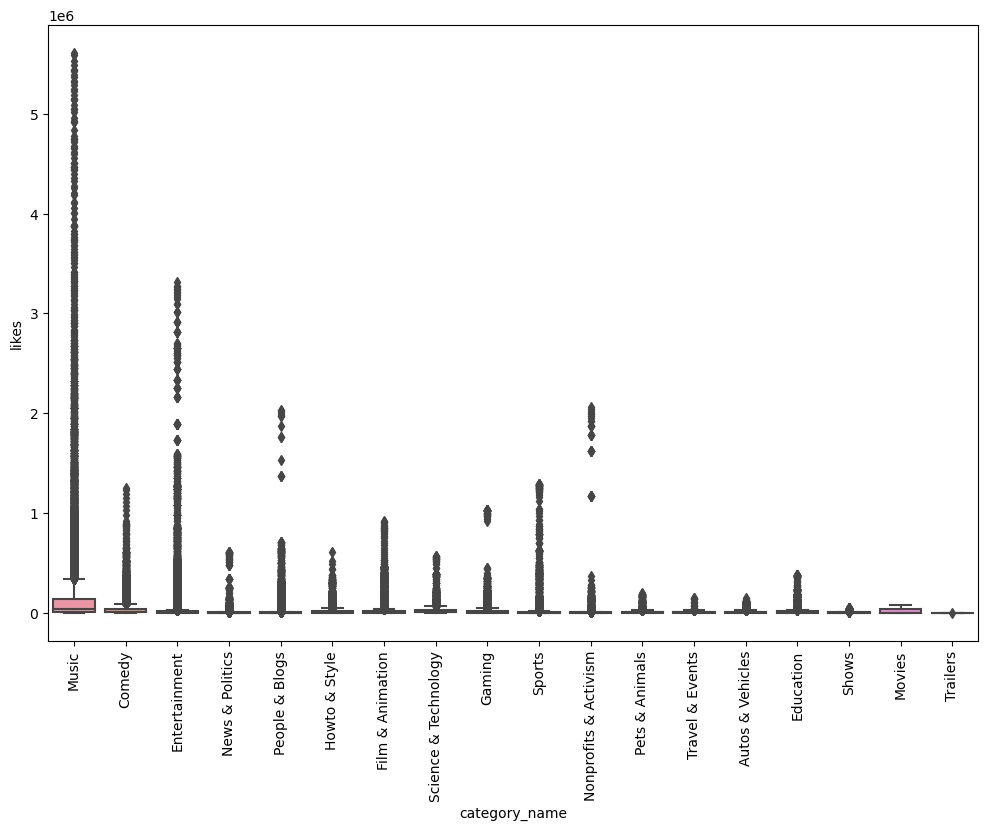

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation = 'vertical')

## Find out weather audience is engaged or not

In [75]:
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

In [76]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

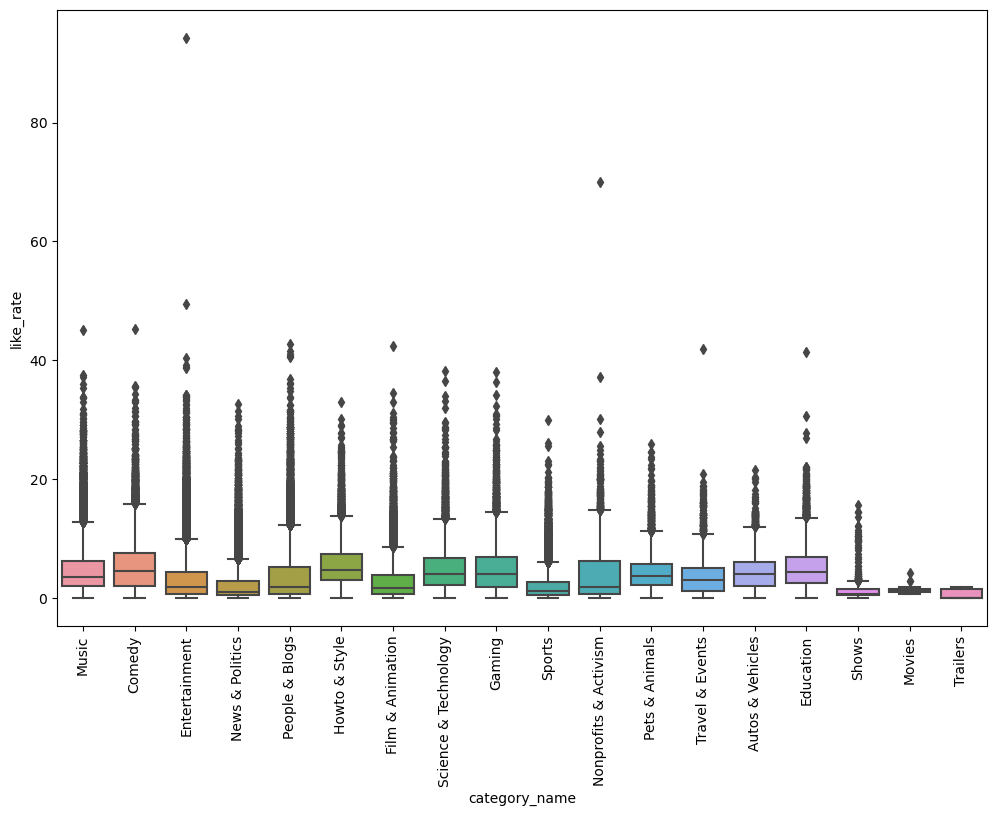

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

# if no need of any text or just want to see graph than use show() function

<Axes: xlabel='views', ylabel='likes'>

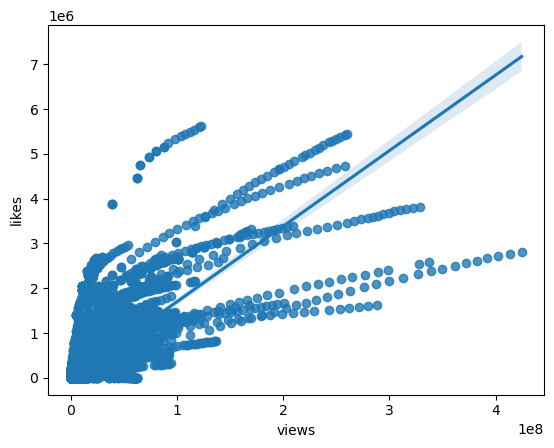

In [78]:
sns.regplot(x='views', y='likes', data=full_df)

In [79]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

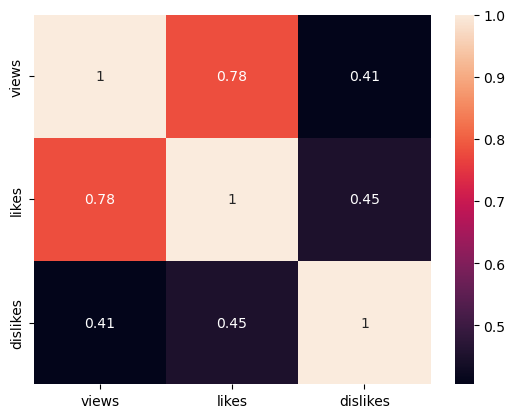

In [80]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

## Analyzing Which channel have the largest number of trending videos?

In [81]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: channel_title, Length: 37824, dtype: int64

In [82]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [83]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [84]:
cdf = cdf.rename(columns={0 : 'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [85]:
print(cdf.columns)


Index(['channel_title', 'total_videos'], dtype='object')


In [86]:
import plotly.express as px

px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

## Does punctuations in title and tags have any relation with views, dislikes comments?

In [87]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [88]:
import string

In [89]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [91]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [92]:
full_df['title'].apply(punc_count)

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: title, Length: 339525, dtype: int64

<Axes: xlabel='title', ylabel='views'>

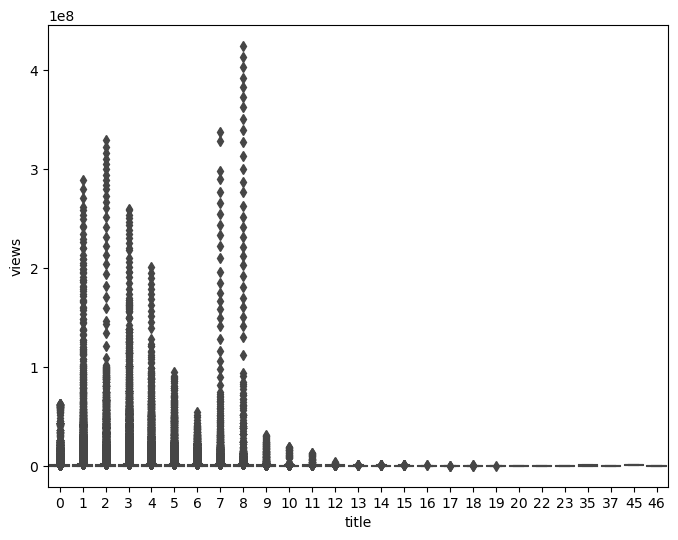

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(x=full_df['title'].apply(punc_count), y='views', data=full_df)